In [1]:
import mpmath
import sympy as sym
import numpy as np
from matplotlib import pyplot as plt

parameters

In [2]:
d = 1
k0d_num = 0.4826 * np.pi
k0d = sym.symbols('{k_0}d', real=True)
kexd_num = np.pi
kexd = sym.pi

function preparation

In [3]:
def kz_plus_num(kzd, k0d, d):
    return np.exp(1j * (k0d + kzd) )
def kz_minus_num(kzd, k0d, d):
    return np.exp(1j * (k0d - kzd) )

def polylog(s,z):
    return complex(mpmath.polylog(s,z))

In [4]:
def exp_expansion(substitute, order):

    x = sym.symbols('x')
    
    f = sym.series(sym.exp(sym.I * x), x, 0 ,order+1).removeO()

    result = f.subs('x', substitute)
    
    return result

def pl_expansion(s, substitute, k0d, d, bias, order, plus=True):

    x = sym.symbols('x')

    if plus:
        f = sym.series(sym.polylog(s, x), x, sym.exp(sym.I * (k0d + bias)), order+1).removeO()
    else:
        f = sym.series(sym.polylog(s, x), x, sym.exp(sym.I * (k0d - bias)), order+1).removeO()

    result = f.subs('x', substitute)

    return result

In [5]:
def kz_plus(kzd, k0d, d, bias, order):
    
    return sym.exp(sym.I * (k0d + bias)) * exp_expansion(kzd-bias, order)
    
def kz_minus(kzd, k0d, d, bias, order):
    
    return sym.exp(sym.I * (k0d - bias)) * exp_expansion(-(kzd-bias), order)

dispersion function

In [6]:
def dispersion_perp_num(kzd, k0d, d):
    
    polylog_sum = polylog(3, kz_plus_num(kzd, k0d, d)) + polylog(3, kz_minus_num(kzd, k0d, d)) - 1j * k0d * (polylog(2, kz_plus_num(kzd, k0d, d)) + polylog(2, kz_minus_num(kzd, k0d, d))) + k0d**2 * (np.log((1 - kz_plus_num(kzd, k0d, d)) * (1 - kz_minus_num(kzd, k0d, d))))
    
    result = 3/4/k0d**3 * polylog_sum.real
    
    return result

In [7]:
def dispersion_perp_complex_expansion(kzd, k0d, d, bias, order=4):
    
    polylog_sum = pl_expansion(3, kz_plus(kzd, k0d, d, bias, order), k0d, d, bias, order, plus=True) + pl_expansion(3, kz_minus(kzd, k0d, d, bias, order), k0d, d, bias, order, plus=False) -\
                    sym.I * k0d * (pl_expansion(2, kz_plus(kzd, k0d, d, bias, order), k0d, d, bias, order, plus=True) + pl_expansion(2, kz_minus(kzd, k0d, d, bias, order), k0d, d, bias, order, plus=False)) - \
                    k0d**2 * (pl_expansion(1, kz_plus(kzd, k0d, d, bias, order), k0d, d, bias, order, plus=True) + pl_expansion(1, kz_minus(kzd, k0d, d, bias, order), k0d, d, bias, order, plus=False))
    
    result = sym.Integer(3)/sym.Integer(4)/k0d**3 * polylog_sum
    
    return result

construct

In [34]:
def construct_dispersion(coeff_k0, coeff_k2, coeff_k4, k0d, k0d_num, kexd_num):

    coeff_k0_num = float(sym.re(coeff_k0.subs(k0d, k0d_num).evalf()))
    coeff_k2_num = float(sym.re(coeff_k2.subs(k0d, k0d_num).evalf()))
    coeff_k4_num = float(sym.re(coeff_k4.subs(k0d, k0d_num).evalf()))

    result = lambda x: coeff_k0_num + coeff_k2_num * (x - kexd_num)**2 + coeff_k4_num * (x - kexd_num)**4

    return result

In [35]:
kzd = sym.symbols('{k_z}d')
x = sym.symbols('x')

In [36]:
f = dispersion_perp_complex_expansion(kzd, k0d, d, bias=kexd, order=4).subs(kzd, x+kexd)
f = f.expand().collect(x)

In [37]:
coeff_k4 = sym.simplify(f.coeff(x**4))
coeff_k2 = sym.simplify(f.coeff(x**2))
coeff_k0 = sym.simplify(f.subs(x, 0))

In [38]:
coeff_k4

({k_0}d**2*exp(2*I*{k_0}d) - 4*{k_0}d**2*exp(I*{k_0}d) + {k_0}d**2 - I*{k_0}d*exp(2*I*{k_0}d) + I*{k_0}d - exp(2*I*{k_0}d) - 2*exp(I*{k_0}d) - 1)*exp(I*{k_0}d)/(16*{k_0}d**3*(exp(4*I*{k_0}d) + 4*exp(3*I*{k_0}d) + 6*exp(2*I*{k_0}d) + 4*exp(I*{k_0}d) + 1))

In [39]:
coeff_k2

3*(-{k_0}d**2*exp(I*{k_0}d) - I*{k_0}d*exp(2*I*{k_0}d) - I*{k_0}d*exp(I*{k_0}d) - exp(2*I*{k_0}d)*polylog(1, -exp(I*{k_0}d)) - 2*exp(I*{k_0}d)*polylog(1, -exp(I*{k_0}d)) - polylog(1, -exp(I*{k_0}d)))/(4*{k_0}d**3*(exp(2*I*{k_0}d) + 2*exp(I*{k_0}d) + 1))

In [40]:
coeff_k0

3*(-{k_0}d**2*polylog(1, -exp(I*{k_0}d)) - I*{k_0}d*polylog(2, -exp(I*{k_0}d)) + polylog(3, -exp(I*{k_0}d)))/(2*{k_0}d**3)

In [74]:
dispersion_perp_constructed = construct_dispersion(coeff_k0, coeff_k2, coeff_k4, k0d, k0d_num, kexd_num)

In [75]:
kzd_array = np.linspace(0.97, 1.03,300)
omega_perp_array = np.array(list(map(lambda x: dispersion_perp_num(x, k0d_num, d), kzd_array*np.pi)))
omega_perp_constructed_array = np.array(list(map(lambda x: dispersion_perp_constructed(x), kzd_array*np.pi)))

kzd_array_longer = np.linspace(0.0, 2.0,300)
omega_perp_array_longer = np.array(list(map(lambda x: dispersion_perp_num(x, k0d_num, d), kzd_array_longer*np.pi)))
omega_perp_constructed_array_longer = np.array(list(map(lambda x: dispersion_perp_constructed(x), kzd_array_longer*np.pi)))

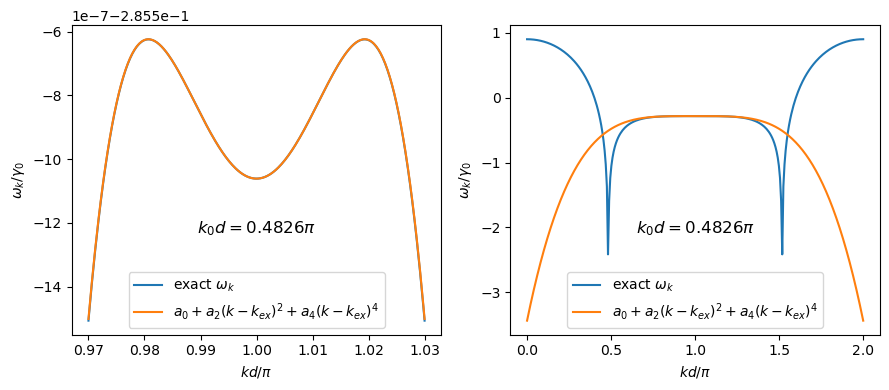

In [76]:
fig, axes = plt.subplots(1,2,figsize=(9,4))
axes[0].plot(kzd_array, omega_perp_array, label=r'exact $\omega_k$')
axes[0].plot(kzd_array, omega_perp_constructed_array, label=r'$a_0 + a_2 (k - k_{ex})^2 + a_4 (k - k_{ex})^4 $')
axes[0].set_title(r'$k_0 d = 0.4826 \pi$', y=0.3)
axes[0].set_ylabel(r'$\omega_k/\gamma_0$')
axes[0].set_xlabel(r'$kd/\pi$')
axes[0].legend()
axes[1].plot(kzd_array_longer, omega_perp_array_longer, label=r'exact $\omega_k$')
axes[1].plot(kzd_array_longer, omega_perp_constructed_array_longer, label=r'$a_0 + a_2 (k - k_{ex})^2 + a_4 (k - k_{ex})^4 $')
axes[1].set_title(r'$k_0 d = 0.4826 \pi$', y=0.3)
axes[1].set_ylabel(r'$\omega_k/\gamma_0$')
axes[1].set_xlabel(r'$kd/\pi$')
axes[1].legend()
plt.tight_layout()
plt.show()